PROBLEM STATEMENT:
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

Attrition in HR:

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies.

Attrition affecting Companies:

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

 
How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step. 


The high attrition value tells that the high number of losing employees.it can be analysed with below codes

#load necessary libraries

In [2]:
import pandas as pd
import statistics
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

df=pd.read_csv(r'/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df
df.to_csv("HR_ATTRITION.csv",sep='\t')

In [3]:
#create dataframe
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [4]:
len(df)

1470

Here Department,BusinessTravel, EducationField,Gender,JobRole,MaritalStatus,BusinessTravel,Over time are the columns which are having categorical string data type and all the other columns are categorical ordinal data type and StockOptionLevel,EmployeeCount are nominal data types et.,

The target column of data set is Attrition which is categorical nominal data type.hence it is a Regression problem.

The table values in integers for variables like education ,distance from home,environment satisfaction,job involvement etc., indicates to make the analyse easier if is numerical values we can compare with attrition and make conclusion easily and shortly


In [5]:
df.columns #checking column names

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

EDA:

In [7]:
df.isnull().sum() #checking null values

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
#Assigning the values o and 1 to Target column Attrition instead of yes and No
Num_val = {'Yes':1, 'No':0}
df['Attrition'] = df["Attrition"].apply(lambda x: Num_val[x])
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [9]:
#drop unwanted columns
df.drop(['EmployeeCount', 'StandardHours','EmployeeNumber','Over18'], axis=1, inplace=True)

since these columns are not needed for model because it is a standard value

#gettting unique values to know its count

In [10]:
df['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [11]:
df['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [12]:
df['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [13]:
Attrition_department=df.pivot_table(values='Attrition',index='Department')
Attrition_department

,Attrition
Department,
Human Resources,0.190476
Research & Development,0.138398
Sales,0.206278


In [14]:
df.groupby(['Department'])['Attrition'].value_counts()

Department              Attrition
Human Resources         0             51
                        1             12
Research & Development  0            828
                        1            133
Sales                   0            354
                        1             92
Name: Attrition, dtype: int64

reasearch and development has high attrition here

In [15]:
df.groupby(['BusinessTravel'])['Attrition'].value_counts()

BusinessTravel     Attrition
Non-Travel         0            138
                   1             12
Travel_Frequently  0            208
                   1             69
Travel_Rarely      0            887
                   1            156
Name: Attrition, dtype: int64

people who travel rarely has more attrition

In [16]:
df.groupby(['EducationField'])['Attrition'].value_counts()

EducationField    Attrition
Human Resources   0             20
                  1              7
Life Sciences     0            517
                  1             89
Marketing         0            124
                  1             35
Medical           0            401
                  1             63
Other             0             71
                  1             11
Technical Degree  0            100
                  1             32
Name: Attrition, dtype: int64

life sciences education field has more attrition

In [17]:
df.groupby(['Age'])['Attrition'].value_counts()

Age  Attrition
18   0             4
     1             4
19   1             6
     0             3
20   1             6
                  ..
57   0             4
58   0             9
     1             5
59   0            10
60   0             5
Name: Attrition, Length: 82, dtype: int64

these are values grouped by gender to know their respective attrition.it can be viewed later in graph below

In [18]:
df.groupby(['Education'])['Attrition'].value_counts()

Education  Attrition
1          0            139
           1             31
2          0            238
           1             44
3          0            473
           1             99
4          0            340
           1             58
5          0             43
           1              5
Name: Attrition, dtype: int64

education category third type has more attrition than others

In [19]:
df.groupby(['JobRole'])['Attrition'].value_counts()

JobRole                    Attrition
Healthcare Representative  0            122
                           1              9
Human Resources            0             40
                           1             12
Laboratory Technician      0            197
                           1             62
Manager                    0             97
                           1              5
Manufacturing Director     0            135
                           1             10
Research Director          0             78
                           1              2
Research Scientist         0            245
                           1             47
Sales Executive            0            269
                           1             57
Sales Representative       0             50
                           1             33
Name: Attrition, dtype: int64

laboratory technician has more attrition than others.human resources has less attrition than others

In [20]:
df.groupby(['Gender'])['Attrition'].value_counts()

Gender  Attrition
Female  0            501
        1             87
Male    0            732
        1            150
Name: Attrition, dtype: int64

male gender are leaving the company more than females

In [21]:
df.groupby(['MaritalStatus'])['Attrition'].value_counts()

MaritalStatus  Attrition
Divorced       0            294
               1             33
Married        0            589
               1             84
Single         0            350
               1            120
Name: Attrition, dtype: int64

unmarried single are leaving the company more than others

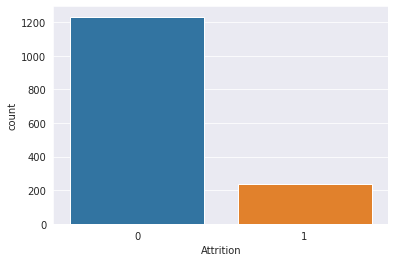

In [22]:
sns.set_style('darkgrid')
sns.countplot(x ='Attrition', data = df)

In overall the non leaving people are higher  in count than the people who are quitting the job 

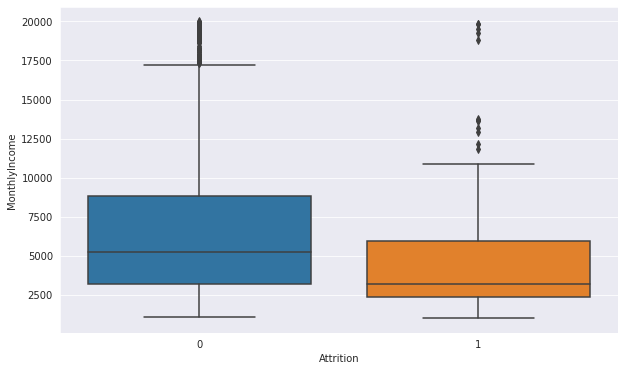

In [23]:
plt.figure(figsize =(10, 6))
sns.boxplot(y ='MonthlyIncome', x ='Attrition', data =df)

we can observe the median of monthly income of non quitting people is higher here. the people who are getting higher income will not leave the company much.

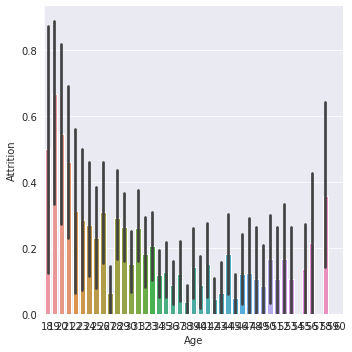

In [24]:
ax=sns.catplot(x="Age",y="Attrition",data=df,kind="bar")


when age increases there is lower chance of quitting job

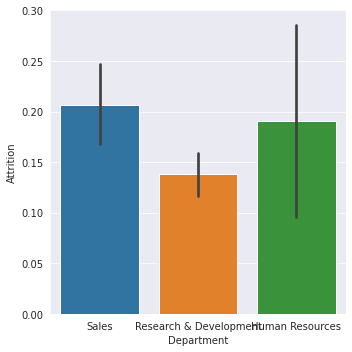

In [25]:
ax=sns.catplot(x="Department",y="Attrition",data=df,kind="bar")


the sales department has higher attrition of people in overall

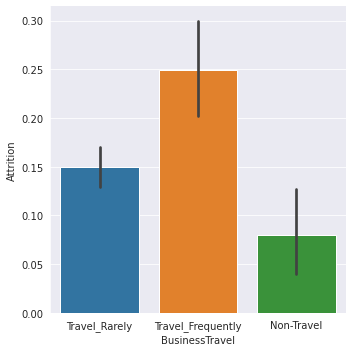

In [26]:
sns.catplot(x="BusinessTravel",y="Attrition",data=df,kind="bar")

business people who travel frequently has lower chance of quitting job.but people who dont travel has higher attrition

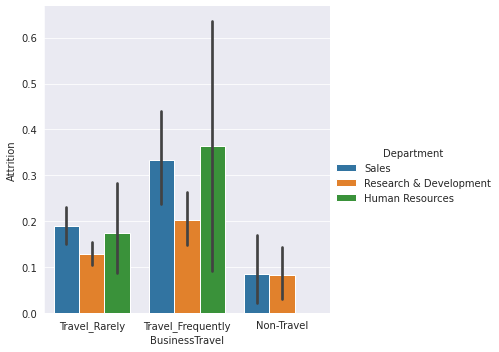

In [27]:
sns.catplot(x="BusinessTravel",y="Attrition",hue="Department",data=df,kind="bar")

but Hr people and sales people who travel frequently has higher attrition

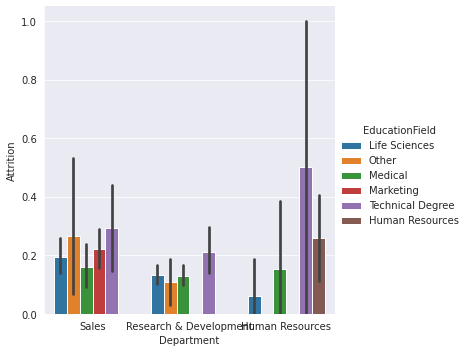

In [28]:
sns.catplot(x="Department",y="Attrition",hue="EducationField",data=df,kind="bar")

technical degree has higher attrition and life sciences has lower attrition

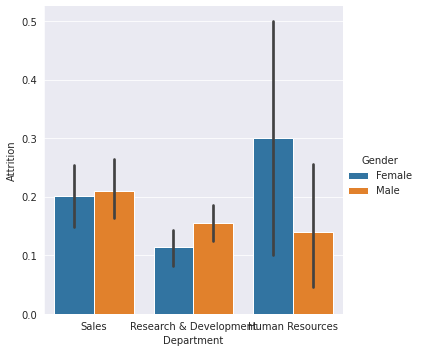

In [29]:
sns.catplot(x="Department",y="Attrition",hue="Gender",data=df,kind="bar")

female gender in HR has more attrition

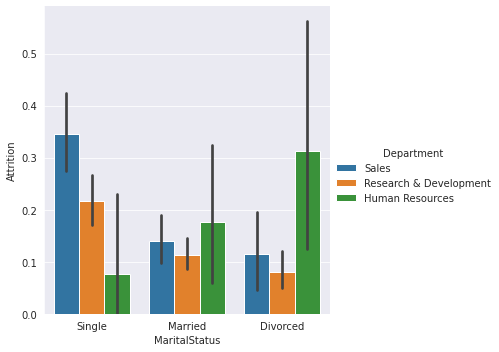

In [30]:
sns.catplot(x="MaritalStatus",y="Attrition",hue="Department",data=df,kind="bar")

unmarried people in sales has more attrition

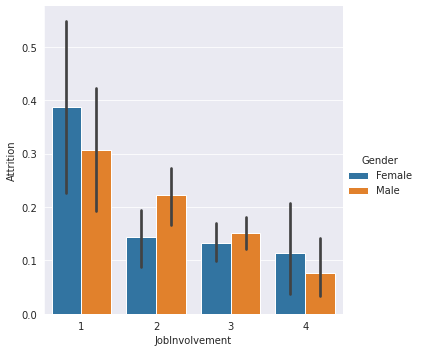

In [31]:
sns.catplot(x="JobInvolvement",y="Attrition",hue="Gender",data=df,kind="bar")

female with job involvement has higher attrition

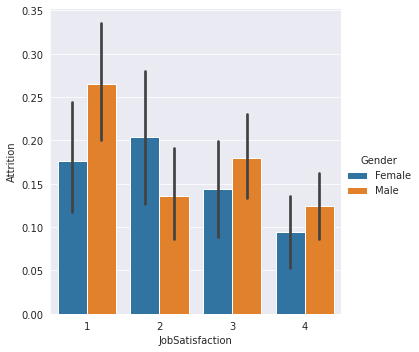

In [32]:
sns.catplot(x="JobSatisfaction",y="Attrition",hue="Gender",data=df,kind="bar")

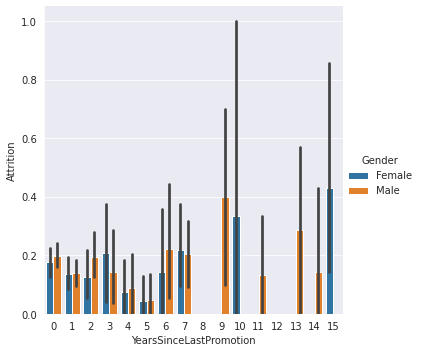

In [33]:
sns.catplot(x="YearsSinceLastPromotion",y="Attrition",hue="Gender",data=df,kind="bar")

if promotion delays attrition increases

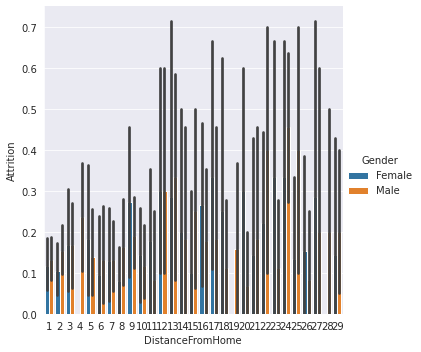

In [34]:
sns.catplot(x="DistanceFromHome",y="Attrition",hue="Gender",data=df,kind="bar")

if distance from home increases attrition increases

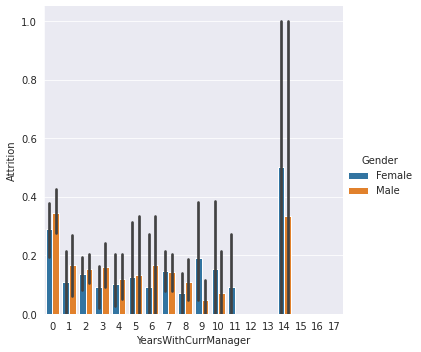

In [35]:
sns.catplot(x="YearsWithCurrManager",y="Attrition",hue="Gender",data=df,kind="bar")

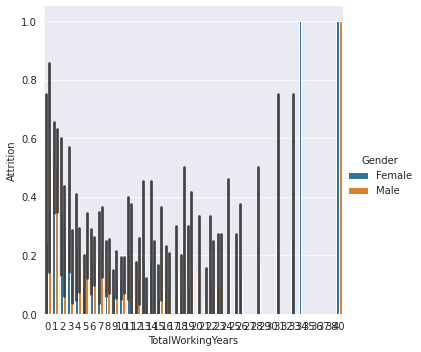

In [36]:
sns.catplot(x="TotalWorkingYears",y="Attrition",hue="Gender",data=df,kind="bar")

if working hours increases attrition increases

In [37]:
df_cat = df[['DistanceFromHome','JobSatisfaction','MonthlyIncome','OverTime','PercentSalaryHike','TotalWorkingYears','YearsAtCompany','YearsSinceLastPromotion','YearsWithCurrManager']]

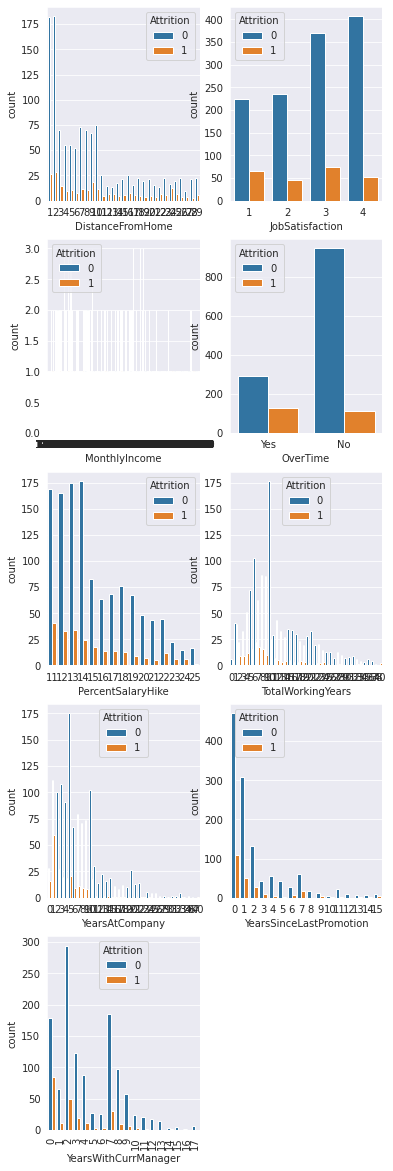

In [38]:
#plot the categorical plots for columns
j=0
for i in df_cat.columns:
    j +=1
    plt.subplot(5,2,j)
    ax1 = sns.countplot(data=df,x= i,hue="Attrition")
    if(j==9 or j== 10):
        plt.xticks( rotation=90)
    for p in ax1.patches:
        height = p.get_height()
        #ax1.text(p.get_x()+p.get_width()/2.,
               # height + 3,
                #'{:1.2f}'.format(height/total_records,0),
                #ha="center",rotation=0) 

# Custom the subplot layout
plt.subplots_adjust(bottom=0.1, top=4)
plt.show()


this graph shows that when does the attrition increases and its increase is depends on what basis.

Text(0.5, 1.0, 'Employee Job Satisfaction Rating - Attrition vs No Attrition')

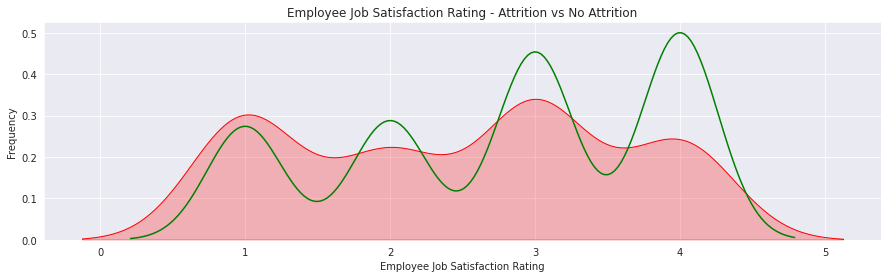

In [39]:
fig=plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['Attrition']==0),'JobSatisfaction'],color='g',shade=False,label='No Attrition')
ax=sns.kdeplot(df.loc[(df['Attrition']==1),'JobSatisfaction'],color='r',shade=True,label='Attrition')
ax.set(xlabel='Employee Job Satisfaction Rating',ylabel='Frequency')
plt.title('Employee Job Satisfaction Rating - Attrition vs No Attrition')

this shows no attrition people are higher in number in company than the attrition people

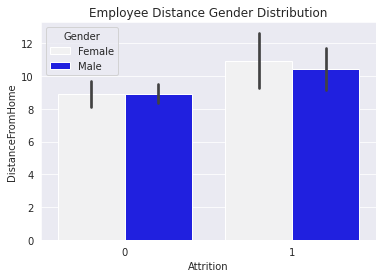

In [40]:
sns.barplot(x='Attrition',y='DistanceFromHome',hue='Gender',data=df,color='blue').set_title('Employee Distance Gender Distribution')
plt.show()

female comes from distance has higher attrition

(-1.105376876606985,
 1.1072426559859583,
 -1.1065727337408717,
 1.1060467988520715)

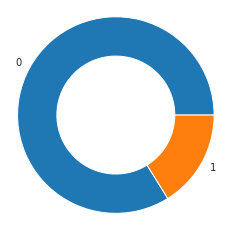

In [41]:
sorted_counts=df['Attrition'].value_counts()
plt.pie(sorted_counts,labels=sorted_counts.index,wedgeprops={'width':0.4})
plt.axis('square')

class has imbalance that the higher attrition people is only less in number in overall

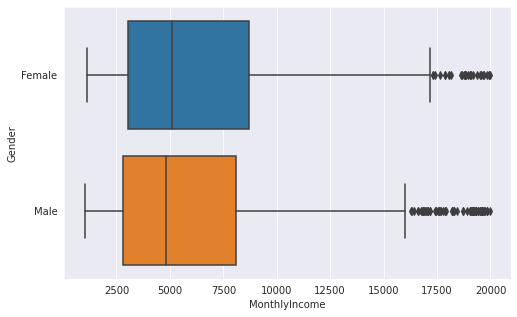

In [42]:
plt.figure(figsize=(8, 5))
sns.boxplot(x = 'MonthlyIncome', y = 'Gender', data = df)

monthly income of female is more than the male in overall

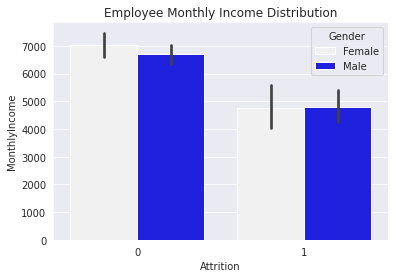

In [43]:
sns.barplot(x='Attrition',y='MonthlyIncome',hue='Gender',data=df,color='blue').set_title('Employee Monthly Income Distribution')
plt.show()

when monthly income increases thus the attrition decreases

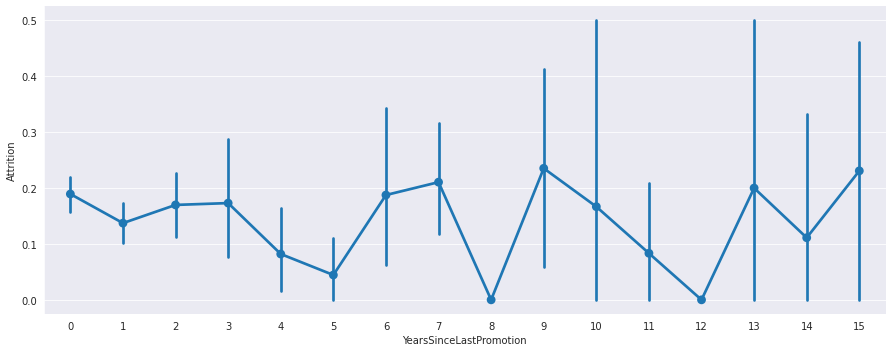

In [44]:
axes = sns.factorplot('YearsSinceLastPromotion','Attrition', data=df, aspect = 2.5, )

delay in promotion increases attrition

DATA PRE-PROCESSING And FEATURE ENGINEERING

In [45]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [46]:
#converting string data type to int type using LabelEncoding
le=LabelEncoder()

list1=['BusinessTravel','Gender','Department','EducationField','JobRole','MaritalStatus','OverTime']

for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,3,1,41,4,2,2,4,1,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,4,1,42,2,3,0,1,1,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2,1,87,4,2,4,2,1,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,4,1,63,2,2,7,2,1,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8


In [47]:
#find correlation co.efficient of all variables in table
df.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,0.010146,-0.036311,0.024287,0.029820,0.509604,-0.122427,-0.004892,-0.095029,0.497855,0.028051,0.299635,0.028062,0.003634,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,-0.103369,0.029453,-0.006846,-0.130016,-0.169105,0.067151,-0.103481,0.162070,-0.159840,0.015170,0.043494,0.246118,-0.013478,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,0.004174,-0.032981,0.026528,0.039062,0.019311,0.002724,-0.033962,0.024001,0.034319,-0.014107,0.020875,0.016543,-0.029377,-0.026341,-0.035986,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,0.018355,-0.011716,0.023381,0.046135,0.002966,-0.009472,0.030571,-0.069586,0.007707,-0.032182,0.038153,0.009135,0.022704,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,-0.019395,-0.041583,-0.004144,-0.024586,0.101963,0.662431,0.021001,0.056073,0.053130,0.023642,-0.035882,0.007481,-0.007840,-0.024604,-0.022414,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,-0.016075,-0.001851,0.031131,0.008783,0.005303,-0.001015,-0.003669,-0.014437,-0.017014,0.027473,-0.029251,0.025514,0.040235,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,-0.027128,-0.016547,0.016775,0.042438,0.101589,0.004236,-0.011296,0.004053,0.094961,-0.026084,0.126317,-0.020322,-0.011111,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,0.043163,-0.002504,-0.021941,-0.002655,-0.044933,0.015599,-0.034401,0.014420,-0.041070,-0.027182,-0.008663,0.002259,-0.011214,-0.005614,-0.004378,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EnvironmentSatisfaction,0.010146,-0.103369,0.004174,0.018355,-0.019395,-0.016075,-0.027128,0.043163,1.000000,0.000508,-0.049857,-0.008278,0.001212,-0.017321,-0.006784,-0.003593,-0.006259,0.037600,0.012594,0.070132,-0.031701,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
Gender,-0.036311,0.029453,-0.032981,-0.011716,-0.041583,-0.001851,-0.016547,-0.002504,0.000508,1.000000,-0.000478,0.017960,-0.039403,-0.039723,0.033252,-0.047183,-0.031858,-0.041482,-0.039147,-0.041924,0.002733,-0.013859,0.022868,0.012716,-0.046881,-0.038787,-0.002753,-0.029747,-0.041483,-0.026985,-0.030599


here over time column is the most positively correlated with target column and others are less correlated and some are negatively correlated with the target column

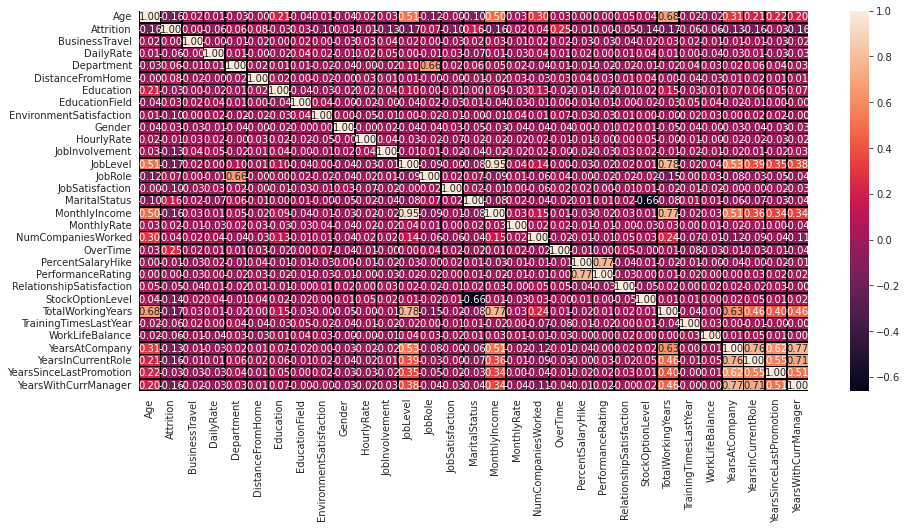

In [48]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor="black",fmt='.2f')

hourly rate is the least correlated and over time are most correlated with the target column

In [49]:
df.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,2.721769,0.600000,65.891156,2.729932,2.063946,4.458503,2.728571,1.097279,6502.931293,14313.103401,2.693197,0.282993,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,1.093082,0.490065,20.329428,0.711561,1.106940,2.461821,1.102846,0.730121,4707.956783,7117.786044,2.498009,0.450606,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,30.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1009.000000,2094.000000,0.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,2.000000,0.000000,48.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2911.000000,8047.000000,1.000000,0.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,3.000000,1.000000,66.000000,3.000000,2.000000,5.000000,3.000000,1.000000,4919.000000,14235.500000,2.000000,0.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,4.000000,1.000000,83.750000,3.000000,3.000000,7.000000,4.000000,2.000000,8379.000000,20461.500000,4.000000,1.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,4.000000,1.000000,100.000000,4.000000,5.000000,8.000000,4.000000,2.000000,19999.000000,26999.000000,9.000000,1.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


there is much diff between 75% and max so there might be skewness present and also there is no any mean and std dev are much very closer to zero

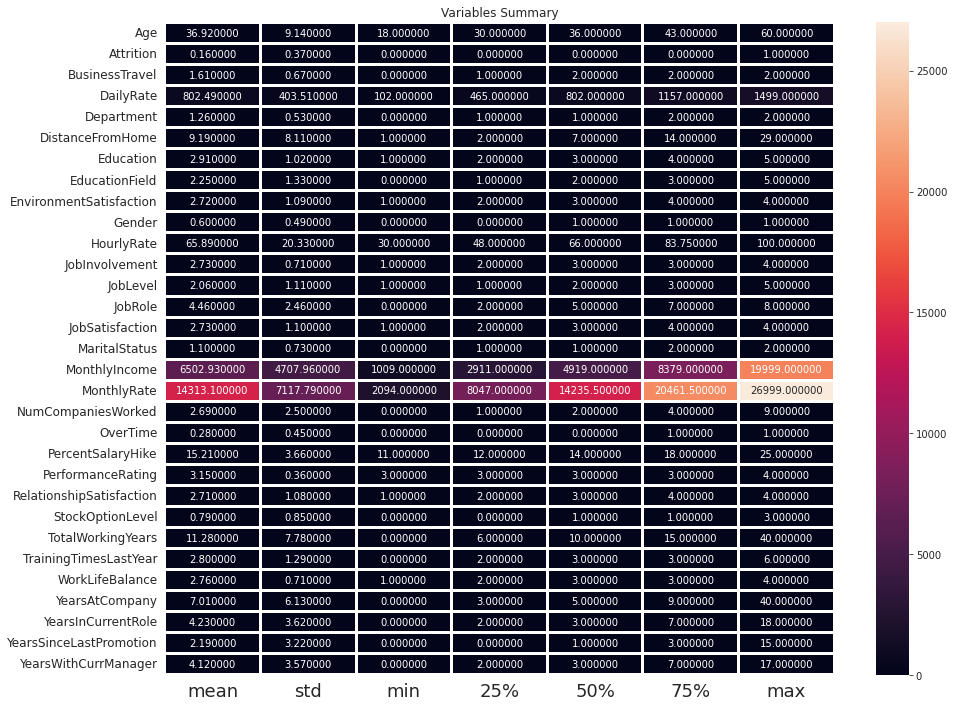

In [50]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variables Summary")
plt.show()

In [51]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [52]:
#VIF calculation
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [53]:
df.shape

(1470, 31)

In [54]:
df.shape[1]

31

In [55]:
#calculates vif
def calc_vif(df):
    vif=pd.DataFrame()
    vif['Variables']=df.columns
    vif['VIF FACTOR']=[variance_inflation_factor(df.values,i)for i in range(df.shape[1])]
    return(vif)


calc_vif(df)

,Variables,VIF FACTOR
0,Age,33.357814
1,Attrition,1.487236
2,BusinessTravel,6.749035
3,DailyRate,4.975791
4,Department,13.044796
5,DistanceFromHome,2.337540
6,Education,9.457866
7,EducationField,3.872341
8,EnvironmentSatisfaction,7.198129
9,Gender,2.518932


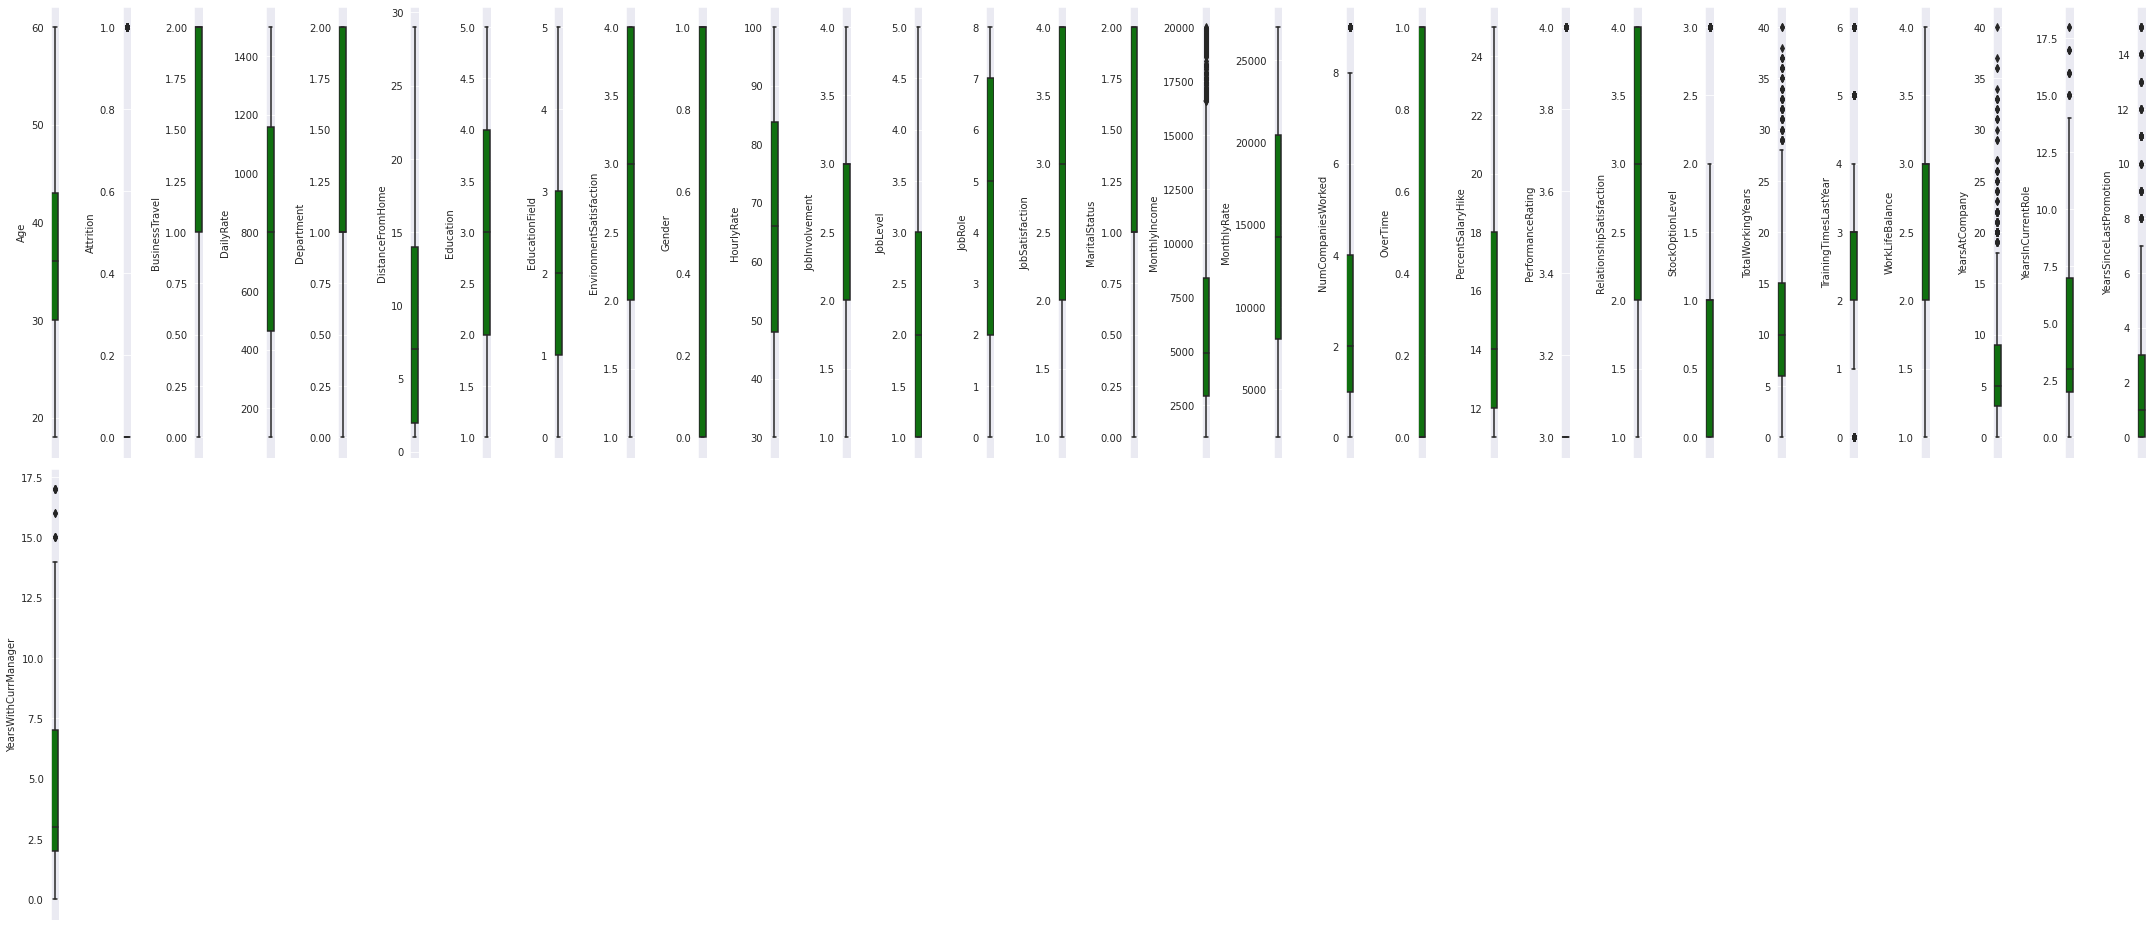

In [56]:
collist=df.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(y=df[collist[i]],color='green',orient='v')
    plt.tight_layout()

there are outliers present in columns

In [57]:
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
Y

In [58]:
df.shape

(1470, 31)

some skewness are present in the dataset

#checking Z-score to remove outliers

In [59]:
import numpy as np
from scipy.stats import zscore
z=np.abs(zscore(df))
z.shape


(1470, 31)

In [60]:
threshold=3
print(np.where(z>3))

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
        123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
        218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
        401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
        561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
        677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
        875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
        962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
       1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
       1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430]), array([30, 29, 27, 29, 28, 29, 24, 24, 27, 29, 28, 29, 30, 24, 27, 29, 30,
       29, 24, 30, 27, 28, 29, 28, 30, 27, 29, 24, 27, 28, 29, 29, 30, 24,
       27, 27, 29, 29, 24, 28, 27, 27, 29, 27, 30, 29, 27, 24, 27, 29, 30,
       24, 30, 27, 29, 27, 30, 29, 28, 28,

In [61]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(1470, 31)
(1387, 31)


some outliers got removed

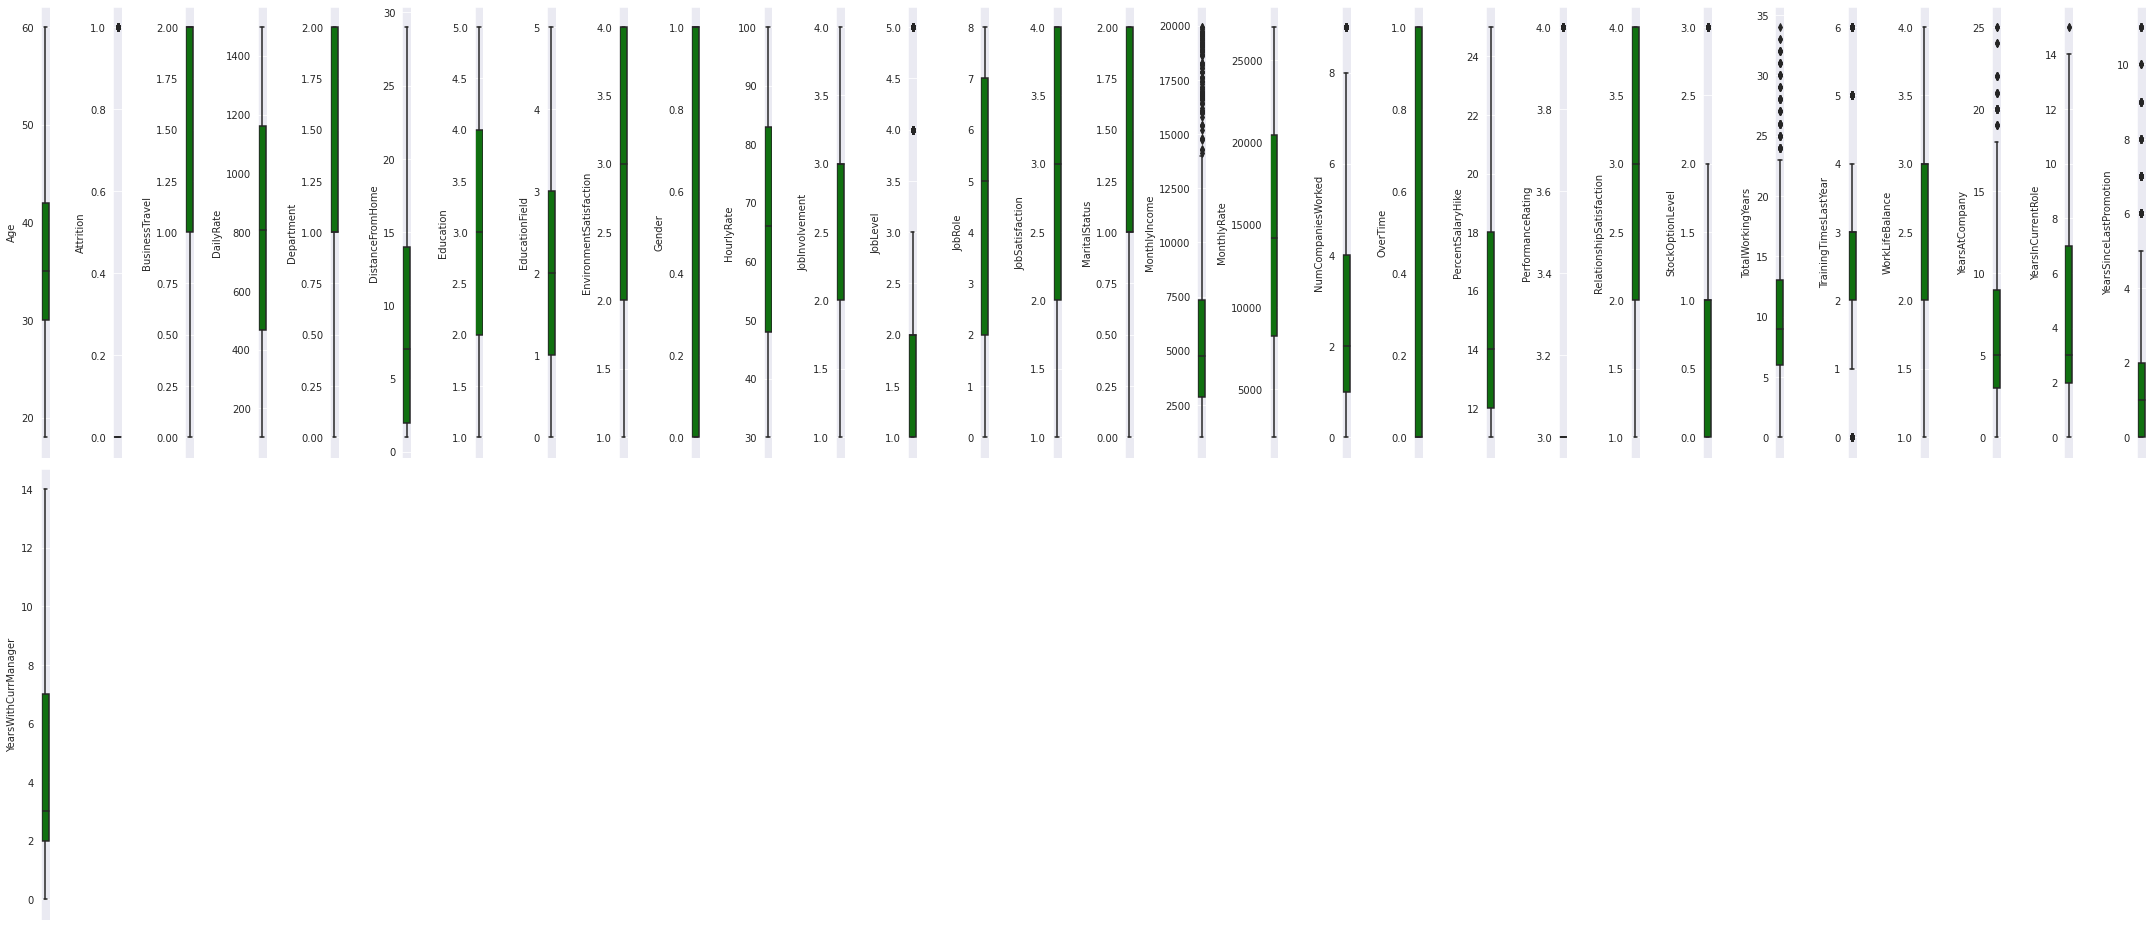

In [62]:
#checking outliers
collist=df_new.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(y=df_new[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [63]:
#finds data loss
loss_percent=(1470-1387)/(1470*100)
print(loss_percent)

0.000564625850340136


since data percentage loss is too low and its cleaned now

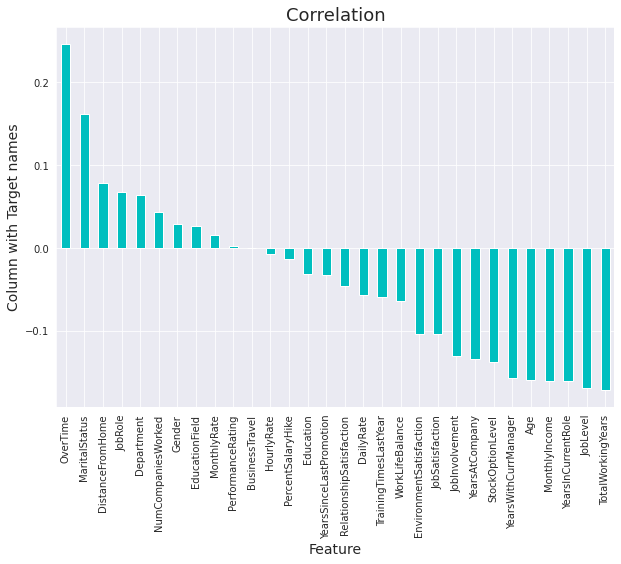

In [64]:
plt.figure(figsize=(10,7))
df.corr()['Attrition'].sort_values(ascending=False).drop(['Attrition']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Column with Target names',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

this graph shows the positive and negative correlation of each variables with target column

In [65]:
df_new


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,3,1,41,4,2,2,4,1,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,4,1,42,2,3,0,1,1,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2,1,87,4,2,4,2,1,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,4,1,63,2,2,7,2,1,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8


In [66]:
v=df_new[list(df_new.columns)[1]] 
df_new=df_new.drop(['Attrition'],axis=1) 
df_new

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,884,1,23,2,3,3,1,41,4,2,2,4,1,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3
1466,39,2,613,1,6,1,3,4,1,42,2,3,0,1,1,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7
1467,27,2,155,1,4,3,1,2,1,87,4,2,4,2,1,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3
1468,49,1,1023,2,2,3,3,4,1,63,2,2,7,2,1,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8


In [67]:
df_new.insert(10,'Attrition',v) 
df_new


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,Attrition,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,2,0,94,1,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,3,1,61,0,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,4,1,92,1,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,4,0,56,0,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,1,1,40,0,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,884,1,23,2,3,3,1,41,0,4,2,2,4,1,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3
1466,39,2,613,1,6,1,3,4,1,42,0,2,3,0,1,1,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7
1467,27,2,155,1,4,3,1,2,1,87,0,4,2,4,2,1,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3
1468,49,1,1023,2,2,3,3,4,1,63,0,2,2,7,2,1,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8


In [68]:
df_new.shape

(1387, 31)

In [69]:
#seggregate input data and output data
x=df_new.iloc[:,:-1]
y=df_new.iloc[:,-1]

In [70]:
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,Attrition,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
0,41,2,1102,2,1,2,1,2,0,94,1,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0
1,49,1,279,1,8,1,1,3,1,61,0,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1
2,37,2,1373,1,2,2,4,4,1,92,1,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0
3,33,1,1392,1,3,4,1,4,0,56,0,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3
4,27,2,591,1,2,1,3,1,1,40,0,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,884,1,23,2,3,3,1,41,0,4,2,2,4,1,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0
1466,39,2,613,1,6,1,3,4,1,42,0,2,3,0,1,1,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1
1467,27,2,155,1,4,3,1,2,1,87,0,4,2,4,2,1,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0
1468,49,1,1023,2,2,3,3,4,1,63,0,2,2,7,2,1,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0


In [71]:
y

0       5
1       7
2       0
3       0
4       2
       ..
1465    3
1466    7
1467    3
1468    8
1469    2
Name: YearsWithCurrManager, Length: 1387, dtype: int64

SKEWNESS REMOVAL AND SCALING

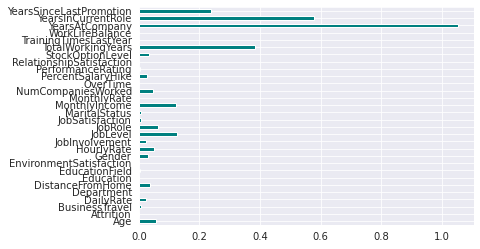

In [72]:
#selecting feature for to predict the target
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
importances=mutual_info_classif(x,y)
feat_importances=pd.Series(importances,df.columns[0:len(df.columns)-1])
feat_importances.plot(kind='barh',color='teal')
plt.show()

In [73]:
#removing skewness
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[ 0.61013332,  0.63872976,  0.75061538, ...,  0.23183674,
         0.29052433, -1.07353381],
       [ 1.37182973, -1.38077629, -1.34337244, ...,  0.94831871,
         1.0065754 ,  0.19316755],
       [ 0.18248603,  0.63872976,  1.33708042, ..., -2.15608852,
        -1.57181404, -1.07353381],
       ...,
       [-1.0804891 ,  0.63872976, -1.75453754, ...,  0.23183674,
        -0.39076907, -1.07353381],
       [ 1.37182973, -1.38077629,  0.57328582, ...,  0.79126361,
         0.79376377, -1.07353381],
       [-0.16377603,  0.63872976, -0.37222758, ..., -0.25722883,
        -0.01873824,  0.19316755]])

In [74]:
#train test split
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [75]:
#importing module-------scaling
from sklearn.preprocessing import MinMaxScaler
# creating normalization object 
norm = MinMaxScaler()
# fit data
norm_fit = norm.fit(x_train)
new_xtrain = norm_fit.transform(x_train)
new_xtest = norm_fit.transform(x_test)
# display values
print(new_xtrain)
print(new_xtest)

[[0.28170214 1.         0.4126688  ... 0.59337023 0.55798909 0.62365597]
 [0.         1.         0.12798343 ... 0.         0.         0.        ]
 [0.4237412  1.         0.08275897 ... 0.34050581 0.30949453 0.43975871]
 ...
 [0.39690187 1.         0.91765373 ... 0.15732518 0.         0.        ]
 [0.70069879 1.         0.71851654 ... 0.84821225 0.93268298 0.43975871]
 [0.25067568 1.         0.93191175 ... 0.46131508 0.40698574 0.        ]]
[[0.8340071  1.         0.97315872 ... 0.46131508 0.48802844 0.7997232 ]
 [0.75986331 0.         0.78762916 ... 0.15732518 0.         0.        ]
 [0.4237412  1.         0.4645726  ... 0.55379108 0.67567065 0.43975871]
 ...
 [0.5002426  1.         0.88474503 ... 0.55379108 0.40698574 0.85054944]
 [0.57142915 1.         0.78576639 ... 0.15732518 0.         0.        ]
 [0.5482411  0.18602294 0.40019137 ... 0.15732518 0.         0.        ]]


In [76]:
##The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones)
###so we are balancing the classes with smote technique

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(k_neighbors=1)
x_train_res, y_train_res = sm.fit_resample(new_xtrain, y_train.ravel())
 
print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
 
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 60
Before OverSampling, counts of label '0': 207 

After OverSampling, the shape of train_X: (3915, 30)
After OverSampling, the shape of train_y: (3915,) 

After OverSampling, counts of label '1': 261
After OverSampling, counts of label '0': 261


MODEL PREDICTION

LogisticRegression

In [174]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split


In [175]:
lr=LogisticRegression()




In [176]:
for i in range(0,100):
   
    lr.fit(x_train_res, y_train_res.ravel())
    pred_train=lr.predict(x_train_res)
    pred_test=lr.predict(new_xtest)
    if round(accuracy_score(y_train_res.ravel(),pred_train)*100,1)== round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state ",i,"model performs well")
        print("At random state:-",i)
        print("Training r2_score is :-",accuracy_score(y_train_res.ravel(),pred_train)*100,1)
        print("Testing r2_score is :-",accuracy_score(y_test,pred_test)*100,1)
        
        
        
   

#cv score

In [177]:
from sklearn.model_selection import cross_val_score
acc_score=accuracy_score(y_test,pred_test)
for j in range(2,10):
    cross_V_score=cross_val_score(lr,x,y,cv=j)
    print("At cv:-",j)
    print("cross validation score is:",acc_score*100)
    print("accuracy score is:",acc_score*100)
    print("\n")
        

At cv:- 2
cross validation score is: 33.81294964028777
accuracy score is: 33.81294964028777


At cv:- 3
cross validation score is: 33.81294964028777
accuracy score is: 33.81294964028777


At cv:- 4
cross validation score is: 33.81294964028777
accuracy score is: 33.81294964028777


At cv:- 5
cross validation score is: 33.81294964028777
accuracy score is: 33.81294964028777


At cv:- 6
cross validation score is: 33.81294964028777
accuracy score is: 33.81294964028777


At cv:- 7
cross validation score is: 33.81294964028777
accuracy score is: 33.81294964028777


At cv:- 8
cross validation score is: 33.81294964028777
accuracy score is: 33.81294964028777


At cv:- 9
cross validation score is: 33.81294964028777
accuracy score is: 33.81294964028777




parameter tuning

In [178]:
#performs GridsearchCV logistic regression
from sklearn.model_selection import GridSearchCV
parameters={'dual':[False,True],'fit_intercept':[True,False],'random_state':list(range(0,1)),'max_iter':[100,50], 'tol':[0.001,0.01]}
lr=LogisticRegression()
clf=GridSearchCV(lr,parameters)
clf.fit(x_train_res,y_train_res)
print(clf.best_params_)


{'dual': False, 'fit_intercept': True, 'max_iter': 100, 'random_state': 0, 'tol': 0.001}


In [179]:
lr=LogisticRegression(fit_intercept= True, dual=False, max_iter= 100, random_state=0, tol= 0.001)
lr.fit(x_train_res,y_train_res.ravel())
pred_test_lr=lr.predict(new_xtest)
pred_train_lr=lr.predict(x_train_res)
lr_score = lr.score(x_train_res,y_train_res)
lr_acc_score=accuracy_score(y_test,pred_test)
print("Accuracy score is:",lr_acc_score*100)
print("score of model is:",lr_score*100)

Accuracy score is: 33.81294964028777
score of model is: 60.43422733077905


In [180]:
cv_score_lr=cross_val_score(lr,x,y,cv=5)
cv_mean_lr=cv_score_lr.mean()
print("cv_mean is:",cv_mean_lr*100)

cv_mean is: 46.21587928213386


In [181]:
print(classification_report(y_test, pred_test)) 

              precision    recall  f1-score   support

           0       0.82      0.76      0.79        54
           1       0.08      0.12      0.10        16
           2       0.69      0.42      0.53        80
           3       0.18      0.17      0.18        23
           4       0.20      0.38      0.26        21
           5       0.11      0.25      0.15         8
           6       0.00      0.00      0.00         7
           7       0.25      0.03      0.05        37
           8       0.00      0.00      0.00        13
           9       0.00      0.00      0.00         8
          10       0.00      0.00      0.00         3
          11       0.17      0.33      0.22         3
          12       0.14      0.20      0.17         5
          13       0.00      0.00      0.00         0

    accuracy                           0.34       278
   macro avg       0.19      0.19      0.17       278
weighted avg       0.43      0.34      0.36       278



In [182]:
print(confusion_matrix(y_test,pred_test))

[[41  1  3  2  2  0  0  0  3  1  0  0  1  0]
 [ 3  2  5  1  1  1  1  0  1  0  1  0  0  0]
 [ 5 15 34  9 12  2  3  0  0  0  0  0  0  0]
 [ 1  2  5  4  6  3  0  1  1  0  0  0  0  0]
 [ 0  3  2  2  8  0  3  0  1  2  0  0  0  0]
 [ 0  0  0  2  2  2  1  0  0  0  0  1  0  0]
 [ 0  2  0  0  1  2  0  0  0  1  0  0  1  0]
 [ 0  0  0  2  4  6  7  1  5  4  3  2  3  0]
 [ 0  0  0  0  1  2  3  1  0  2  1  2  0  1]
 [ 0  0  0  0  3  0  0  1  0  0  1  0  0  3]
 [ 0  0  0  0  0  0  1  0  0  2  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  1  1]
 [ 0  0  0  0  0  1  0  0  0  1  1  0  1  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]]


In [183]:
print(accuracy_score(y_test,pred_test)*100)

33.81294964028777


RandomForestClassifier

In [184]:
# importing modules

from sklearn.ensemble import RandomForestClassifier

#creating RandomForestClassifier constructor
rf = RandomForestClassifier(random_state=5)
# fit data
rf.fit(x_train_res,y_train_res.ravel())
# predicting score
pred_test_rf=rf.predict(new_xtest)
pred_train_rf=rf.predict(x_train_res)
#calculates score of the model using score method
rf_score = rf.score(new_xtest,y_test)
print('score of model is : ',rf_score*100)

score of model is :  58.27338129496403


In [186]:
print("Accuracy Score of Training Data is:",accuracy_score(y_train_res.ravel(),pred_train_rf)*100)
print("Accuracy Score of Testing Data is:",accuracy_score(y_test,pred_test_rf)*100)

        

Accuracy Score of Training Data is: 100.0
Accuracy Score of Testing Data is: 58.27338129496403


In [187]:
#choosing best Random state
for i in range(0,100):
    rf.fit(x_train_res, y_train_res.ravel())
    pred_train_rf=rf.predict(x_train_res)
    pred_test_rf=rf.predict(new_xtest)
    if round(accuracy_score(y_train_res.ravel(),pred_train_rf)*100,1)== round(accuracy_score(y_test,pred_test_rf)*100,1):
        print("At random state ",i,"model performs well")
        print("At random state:-",i)
        print("Training r2_score is :-",accuracy_score(y_train_res.ravel(),pred_train_rf)*100)
        print("Testing r2_score is :-",accuracy_score(y_test,pred_test_rf)*100)
        

In [188]:
print("accuracy score is:",accuracy_score(y_test,pred_test_rf)*100)

accuracy score is: 58.27338129496403


In [189]:
#cross validation 
from sklearn.model_selection import cross_val_score
acc_score_rf=accuracy_score(y_test,pred_test_rf)
for j in range(2,10):
    cross_V_score=cross_val_score(rf,x,y,cv=j)
    print("At cv:-",j)
    print("cross validation score is:",acc_score_rf*100)
    print("accuracy score is:",acc_score_rf*100)
    print("\n")
        

At cv:- 2
cross validation score is: 58.27338129496403
accuracy score is: 58.27338129496403


At cv:- 3
cross validation score is: 58.27338129496403
accuracy score is: 58.27338129496403


At cv:- 4
cross validation score is: 58.27338129496403
accuracy score is: 58.27338129496403


At cv:- 5
cross validation score is: 58.27338129496403
accuracy score is: 58.27338129496403


At cv:- 6
cross validation score is: 58.27338129496403
accuracy score is: 58.27338129496403


At cv:- 7
cross validation score is: 58.27338129496403
accuracy score is: 58.27338129496403


At cv:- 8
cross validation score is: 58.27338129496403
accuracy score is: 58.27338129496403


At cv:- 9
cross validation score is: 58.27338129496403
accuracy score is: 58.27338129496403




parameter tuning

In [191]:
#performs GridSearchCV on RandomForestClassifier
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['gini', 'entropy'],'n_estimators':[50,100],'max_features':['auto', 'sqrt', 'log2'],'random_state':list(range(0,1)),'min_weight_fraction_leaf':[0.1,0.2],'bootstrap':[True,False]}
rf=RandomForestClassifier()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train_res,y_train_res.ravel())
print(clf.best_params_)


{'bootstrap': True, 'criterion': 'gini', 'max_features': 'log2', 'min_weight_fraction_leaf': 0.1, 'n_estimators': 100, 'random_state': 0}


In [192]:
rf=RandomForestClassifier(criterion="entropy",max_features="auto",n_estimators=50,random_state=2,bootstrap="True",min_weight_fraction_leaf= 0.1)
rf.fit(x_train_res,y_train_res.ravel())
pred_test_rf=rf.predict(new_xtest)
pred_train_rf=rf.predict(x_train_res)
rf_score = rf.score(x_train_res,y_train_res)
rf_acc_score=accuracy_score(y_test,pred_test)
print("Accuracy score is:",rf_acc_score*100)
print("score of model is:",rf_score*100)

Accuracy score is: 33.81294964028777
score of model is: 59.131545338441896


In [193]:
cv_score_rf=cross_val_score(rf,x,y,cv=5)
cv_mean_rf=cv_score_rf.mean()
print("cv_mean is:",cv_mean_rf*100)

cv_mean is: 52.41461704282783


In [194]:
print(confusion_matrix(y_test,pred_test_rf))

[[40  0  0  1  3  1  3  1  0  1  0  0  0  4]
 [ 2  0  2  1  4  0  0  3  0  1  0  0  0  3]
 [39  0 25  4  9  1  0  0  0  0  0  0  0  2]
 [ 7  0  0  4  9  2  0  0  0  1  0  0  0  0]
 [ 3  0  0  2 13  0  1  0  0  1  0  0  0  1]
 [ 2  0  1  0  0  1  1  2  0  1  0  0  0  0]
 [ 0  0  0  0  0  2  0  2  1  1  0  0  0  1]
 [ 0  0  0  0  1  7  3 12  3  6  1  1  1  2]
 [ 0  0  0  0  0  0  2  1  0  9  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  3  0  2  0  3]
 [ 0  0  0  0  0  0  0  0  0  2  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  2  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  2  2]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]]


In [195]:
print(classification_report(y_test,pred_test_rf))

              precision    recall  f1-score   support

           0       0.43      0.74      0.54        54
           1       0.00      0.00      0.00        16
           2       0.89      0.31      0.46        80
           3       0.33      0.17      0.23        23
           4       0.33      0.62      0.43        21
           5       0.07      0.12      0.09         8
           6       0.00      0.00      0.00         7
           7       0.57      0.32      0.41        37
           8       0.00      0.00      0.00        13
           9       0.12      0.38      0.18         8
          10       0.00      0.00      0.00         3
          11       0.29      0.67      0.40         3
          12       0.67      0.40      0.50         5
          14       0.00      0.00      0.00         0

    accuracy                           0.37       278
   macro avg       0.26      0.27      0.23       278
weighted avg       0.49      0.37      0.37       278



DecisionTreeClassifier

In [197]:
from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier(random_state=1)
dtc.fit(x_train_res, y_train_res.ravel())
pred_test_dtc = dtc.predict(new_xtest)
pred_train_dtc = dtc.predict(x_train_res)
dtc_score = dtc.score(new_xtest,y_test)
print('score of model is : ',dtc_score*100)



score of model is :  49.280575539568346


In [198]:
print("Accuracy Score of Training Data is:",accuracy_score(y_train_res.ravel(),pred_train_dtc)*100)
print("Accuracy Score of Testing Data is:",accuracy_score(y_test,pred_test_dtc)*100)


Accuracy Score of Training Data is: 100.0
Accuracy Score of Testing Data is: 49.280575539568346


parameter tuning

In [199]:
#perform gridsearchcv and cross val score on Decison Tree DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
parameters={'criterion':['gini', 'entropy'],'splitter':['best','random'],'max_features':['auto', 'sqrt', 'log2'],'random_state':list(range(0,10)),'max_depth':[11],'min_samples_split': [2,3,4],'min_samples_leaf':[1,2,3] }
dt=DecisionTreeClassifier()
clf=GridSearchCV(dt,parameters)
clf.fit(x_train_res,y_train_res.ravel())
print(clf.best_params_)

{'criterion': 'entropy', 'max_depth': 11, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 1, 'splitter': 'best'}


In [200]:
dt=DecisionTreeClassifier(criterion='gini',max_features= 'auto',max_depth= 11 , random_state= 3, splitter= 'random',min_samples_leaf= 3,min_samples_split= 2)
dt.fit(x_train_res,y_train_res.ravel())
pred_test_dt=dt.predict(new_xtest)
pred_train_dt=dt.predict(x_train_res)
dt_score = dt.score(x_train_res,y_train_res.ravel())
dt_acc_score=accuracy_score(y_test,pred_test_dt)
print("Accuracy score is:",dt_acc_score*100)
print("score of model is:",dt_score*100)

Accuracy score is: 30.575539568345324
score of model is: 68.6845466155811


In [201]:
cv_score_dt=cross_val_score(dt,x,y,cv=5)
cv_mean_dt=cv_score_dt.mean()
print("cv_mean is:",cv_mean_dt*100)

cv_mean is: 39.66106537152949


In [202]:
print(confusion_matrix(y_test,pred_test_dtc))

[[40  3  2  2  3  0  0  2  1  1  0  0  0  0]
 [ 2  1  9  1  0  1  0  2  0  0  0  0  0  0]
 [ 5  9 54  8  3  1  0  0  0  0  0  0  0  0]
 [ 0  1  8  8  5  0  0  1  0  0  0  0  0  0]
 [ 0  0  3  8  8  0  0  1  0  1  0  0  0  0]
 [ 1  0  0  0  2  1  0  2  1  1  0  0  0  0]
 [ 1  0  1  0  0  0  0  2  2  1  0  0  0  0]
 [ 2  2  1  1  1  4  1 18  2  3  2  0  0  0]
 [ 0  2  0  0  0  0  0  1  4  6  0  0  0  0]
 [ 0  1  1  0  0  1  0  0  2  1  2  0  0  0]
 [ 0  0  0  0  0  0  0  1  1  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  1  1]
 [ 0  0  0  0  0  0  0  2  0  0  1  0  1  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]]


In [203]:
print(classification_report(y_test,pred_test_dtc))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76        54
           1       0.05      0.06      0.06        16
           2       0.68      0.68      0.68        80
           3       0.29      0.35      0.31        23
           4       0.36      0.38      0.37        21
           5       0.12      0.12      0.12         8
           6       0.00      0.00      0.00         7
           7       0.56      0.49      0.52        37
           8       0.29      0.31      0.30        13
           9       0.07      0.12      0.09         8
          10       0.17      0.33      0.22         3
          11       0.00      0.00      0.00         3
          12       0.50      0.20      0.29         5
          13       0.00      0.00      0.00         0

    accuracy                           0.49       278
   macro avg       0.28      0.27      0.27       278
weighted avg       0.51      0.49      0.50       278



KNeighborsClassifier

In [204]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_res, y_train_res.ravel())
pred_test_knn = knn.predict(new_xtest)
pred_train_knn = knn.predict(x_train_res)
knn_score = knn.score(new_xtest,y_test)
print('score of model is : ',knn_score*100)



score of model is :  17.62589928057554


In [205]:
print("Accuracy Score of Training Data is:",accuracy_score(y_train_res.ravel(),pred_train_knn)*100)
print("Accuracy Score of Testing Data is:",accuracy_score(y_test,pred_test_knn)*100)


Accuracy Score of Training Data is: 88.35249042145594
Accuracy Score of Testing Data is: 17.62589928057554


parameter tuning

In [206]:
#perform gridsearchcv and cross val score on KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

parameters={'n_neighbors':[4,5,6],'weights':['uniform', 'distance'],'leaf_size':[35,30],'n_jobs':[-1,1],'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'] }
knn=KNeighborsClassifier()
clf=GridSearchCV(knn,parameters)
clf.fit(x_train_res,y_train_res.ravel())
print(clf.best_params_)

{'algorithm': 'auto', 'leaf_size': 35, 'n_jobs': -1, 'n_neighbors': 4, 'weights': 'distance'}


In [208]:
knn=KNeighborsClassifier(algorithm= 'auto', leaf_size= 35, n_jobs= -1, n_neighbors= 6, weights= 'uniform')
knn.fit(x_train_res,y_train_res.ravel())
pred_test_knn=knn.predict(new_xtest)
pred_train_knn=knn.predict(x_train_res)
knn_score = knn.score(x_train_res,y_train_res.ravel())
knn_acc_score=accuracy_score(y_test,pred_test_knn)
print("Accuracy score is:",knn_acc_score*100)
print("score of model is:",knn_score*100)

Accuracy score is: 17.62589928057554
score of model is: 86.94763729246488


In [209]:
cv_score_knn=cross_val_score(knn,x,y,cv=5)
cv_mean_knn=cv_score_knn.mean()
print("cv_mean is:",cv_mean_knn*100)

cv_mean is: 32.73225462950939


In [210]:
print(confusion_matrix(y_test,pred_test_knn))

[[22  4  7  5  6  1  1  2  1  4  0  0  1  0]
 [ 2  3  1  1  2  2  1  1  1  0  0  1  0  1]
 [ 7 16  9 12 17  3  3  5  2  3  2  0  1  0]
 [ 1  2  2  5  6  1  1  2  2  1  0  0  0  0]
 [ 2  3  2  4  1  0  1  1  4  3  0  0  0  0]
 [ 0  1  1  2  0  0  0  0  1  1  2  0  0  0]
 [ 0  1  1  0  2  0  0  0  1  1  0  0  1  0]
 [ 0  2  3  7  0  1  3  8  4  1  2  2  1  3]
 [ 1  3  0  3  0  0  0  1  0  2  2  0  0  1]
 [ 0  0  0  1  1  1  1  2  0  0  0  0  0  2]
 [ 0  0  0  0  1  0  1  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  1  1  0  0  0  0]
 [ 0  0  0  0  0  1  0  1  0  1  0  0  1  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]]


In [211]:
print(classification_report(y_test,pred_test_knn))

              precision    recall  f1-score   support

           0       0.63      0.41      0.49        54
           1       0.09      0.19      0.12        16
           2       0.35      0.11      0.17        80
           3       0.12      0.22      0.16        23
           4       0.03      0.05      0.04        21
           5       0.00      0.00      0.00         8
           6       0.00      0.00      0.00         7
           7       0.35      0.22      0.27        37
           8       0.00      0.00      0.00        13
           9       0.00      0.00      0.00         8
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         3
          12       0.20      0.20      0.20         5
          13       0.00      0.00      0.00         0

    accuracy                           0.18       278
   macro avg       0.13      0.10      0.10       278
weighted avg       0.29      0.18      0.21       278





GaussianNB

In [212]:
from sklearn.naive_bayes import GaussianNB
gnb= GaussianNB()
gnb.fit(x_train_res, y_train_res.ravel())
pred_test_gnb = gnb.predict(new_xtest)
pred_train_gnb = gnb.predict(x_train_res)
gnb_score = gnb.score(new_xtest,y_test)
print('score of model is : ',gnb_score*100)

score of model is :  44.96402877697842


In [213]:
print("Accuracy Score of Training Data is:",accuracy_score(y_train_res.ravel(),pred_train_gnb)*100)
print("Accuracy Score of Testing Data is:",accuracy_score(y_test,pred_test_gnb)*100)


Accuracy Score of Training Data is: 59.54022988505747
Accuracy Score of Testing Data is: 44.96402877697842


parameter tuning

In [214]:
#perform gridsearchcv and cross val score on GaussianNB
from sklearn.model_selection import GridSearchCV
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gnb=GaussianNB() 
clf = GridSearchCV(estimator=gnb, 
                 param_grid=params_NB, 
                 cv=5,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
clf.fit(x_train_res,y_train_res.ravel())
print(clf.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'var_smoothing': 0.0003511191734215131}


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    3.0s finished


In [215]:
gnb=GaussianNB(var_smoothing=0.15199110829529336)
gnb.fit(x_train_res,y_train_res.ravel())
pred_test_gnb=gnb.predict(new_xtest)
pred_train_gnb=gnb.predict(x_train_res)
gnb_score = gnb.score(x_train_res,y_train_res.ravel())
gnb_acc_score=accuracy_score(y_test,pred_test_gnb)
print("Accuracy score is:",gnb_acc_score*100)
print("score of model is:",gnb_score*100)

Accuracy score is: 29.856115107913666
score of model is: 52.158365261813536


In [216]:
cv_score_gnb=cross_val_score(gnb,x,y,cv=5)
cv_mean_gnb=cv_score_gnb.mean()
print("cv_mean is:",cv_mean_gnb*100)




cv_mean is: 46.644417318131055


In [217]:
print(confusion_matrix(y_test,pred_test_gnb))

[[39  2  1  3  2  1  2  0  0  2  0  0  1  1]
 [ 2  4  2  1  1  1  2  0  1  1  0  1  0  0]
 [ 6  8 21 15 20  3  3  0  1  0  0  0  3  0]
 [ 1  1  3  4  6  5  1  0  0  1  0  0  0  1]
 [ 0  1  2  3  6  2  3  0  1  2  0  0  1  0]
 [ 0  0  0  1  3  0  1  0  0  1  0  2  0  0]
 [ 0  2  0  1  0  1  0  0  0  2  0  0  1  0]
 [ 0  0  0  2  2  4  2  5  0 11  4  4  2  1]
 [ 0  0  0  0  1  1  2  1  0  3  1  2  1  1]
 [ 0  0  0  0  1  0  0  1  0  1  0  1  0  4]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  1  1]
 [ 0  0  0  0  0  0  0  1  0  0  0  2  0  0]
 [ 0  0  0  0  0  1  0  0  0  1  1  1  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]]


In [218]:
print(classification_report(y_test,pred_test_gnb))

              precision    recall  f1-score   support

           0       0.81      0.72      0.76        54
           1       0.22      0.25      0.24        16
           2       0.72      0.26      0.39        80
           3       0.13      0.17      0.15        23
           4       0.14      0.29      0.19        21
           5       0.00      0.00      0.00         8
           6       0.00      0.00      0.00         7
           7       0.62      0.14      0.22        37
           8       0.00      0.00      0.00        13
           9       0.04      0.12      0.06         8
          10       0.00      0.00      0.00         3
          11       0.15      0.67      0.25         3
          12       0.09      0.20      0.13         5
          13       0.00      0.00      0.00         0

    accuracy                           0.30       278
   macro avg       0.21      0.20      0.17       278
weighted avg       0.49      0.30      0.34       278



SVC

In [219]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf')
svc.fit(x_train_res, y_train_res.ravel())
pred_test_svc = svc.predict(new_xtest)
pred_train_svc = svc.predict(x_train_res)
svc_score = svc.score(new_xtest,y_test)
print('score of model is : ',svc_score*100)

score of model is :  44.60431654676259


In [220]:
print("Accuracy Score of Training Data is:",accuracy_score(y_train_res.ravel(),pred_train_svc)*100)
print("Accuracy Score of Testing Data is:",accuracy_score(y_test,pred_test_svc)*100)


Accuracy Score of Training Data is: 95.73435504469987
Accuracy Score of Testing Data is: 44.60431654676259


parameter tuning

In [ ]:
#perform gridsearchcv and cross val score on Support Vector classifier

parameters ={'kernel':['linear','rbf'],'gamma':['scale', 'auto'],'tol':[0.01,0.0001,0.001],'shrinking':[True,False],'degree':[3,4],'max_iter':[1,-1],'probability':[True,False]}
svc=SVC()
clf=GridSearchCV(svc,parameters)
clf.fit(x_train_res,y_train_res.ravel())
print(clf.best_params_)


In [125]:
svc=SVC(kernel='rbf',gamma='scale',degree= 3,max_iter= -1, probability= True, shrinking= True, tol= 0.01)
svc.fit(x_train_res,y_train_res.ravel())
pred_test_svc=svc.predict(new_test)
pred_train_svc=svc.predict(x_train_res)
svc_score = svc.score(x_train_res,y_train_res.ravel())
svc_acc_score=accuracy_score(y_test,pred_test)
print("Accuracy score is:",svc_acc_score*100)
print("score of model is:",svc_score*100)

Accuracy score is: 33.81294964028777
score of model is: 61.49684400360685


In [126]:
cv_score_svc=cross_val_score(svc,x,y,cv=5)
cv_mean_svc=cv_score_svc.mean()
print("cv_mean is:",cv_mean_svc*100)

cv_mean is: 48.9535880321014


In [127]:
print(confusion_matrix(y_test,pred_test_svc))

[[41  0  5  2  0  0  0  4  2  0  0  0  0]
 [ 2  0  9  1  0  0  0  3  1  0  0  0  0]
 [ 3  0 77  0  0  0  0  0  0  0  0  0  0]
 [ 1  0 18  1  1  0  0  2  0  0  0  0  0]
 [ 0  0 16  2  0  0  0  3  0  0  0  0  0]
 [ 1  0  4  0  0  0  0  3  0  0  0  0  0]
 [ 0  0  3  0  0  0  0  4  0  0  0  0  0]
 [ 0  0  3  0  0  0  0 33  1  0  0  0  0]
 [ 0  0  0  0  0  0  0 12  1  0  0  0  0]
 [ 0  0  1  0  0  0  0  7  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  3  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  2  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  5  0  0  0  0  0]]


In [128]:
print(classification_report(y_test,pred_test_svc))

              precision    recall  f1-score   support

           0       0.85      0.76      0.80        54
           1       0.00      0.00      0.00        16
           2       0.57      0.96      0.71        80
           3       0.17      0.04      0.07        23
           4       0.00      0.00      0.00        21
           5       0.00      0.00      0.00         8
           6       0.00      0.00      0.00         7
           7       0.41      0.89      0.56        37
           8       0.17      0.08      0.11        13
           9       0.00      0.00      0.00         8
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         5

    accuracy                           0.55       278
   macro avg       0.17      0.21      0.17       278
weighted avg       0.40      0.55      0.45       278



In [130]:
#Gradient Boosting Classifier

Gradient Boosting Classifier

In [131]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=7)
gb.fit(x_train, y_train)
pred_test_gb = gb.predict(x_test)
pred_train_gb = gb.predict(x_train)
gb_score = gb.score(x_test,y_test)
print('score of model is : ',gb_score*100)




score of model is :  55.75539568345324


In [132]:
print("Accuracy Score of Training Data is:",accuracy_score(y_train,pred_train_gb)*100)
print("Accuracy Score of Testing Data is:",accuracy_score(y_test,pred_test_gb)*100)

Accuracy Score of Training Data is: 98.64743011722273
Accuracy Score of Testing Data is: 55.75539568345324


parameter tuning

In [135]:
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['friedman_mse', 'mse'],'n_estimators':[50,100],'max_features':['auto', 'sqrt', 'log2'],'random_state':list(range(0,1)),'min_weight_fraction_leaf':[0.1,0.2],'max_depth':[3,4] }
gb=GradientBoostingClassifier()
clf=GridSearchCV(gb,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)


{'criterion': 'friedman_mse', 'max_depth': 4, 'max_features': 'sqrt', 'min_weight_fraction_leaf': 0.1, 'n_estimators': 50, 'random_state': 0}


In [136]:
gb=GradientBoostingClassifier(criterion="friedman_mse",max_features="auto",n_estimators=100,random_state=0,max_depth= 4,min_weight_fraction_leaf= 0.1)
gb.fit(x_train,y_train)
pred_test_gb=gb.predict(x_test)
pred_train_gb=gb.predict(x_train)
gb_score = gb.score(x_train,y_train)
gb_acc_score=accuracy_score(y_test,pred_test)
print("Accuracy score is:",gb_acc_score*100)
print("score of model is:",gb_score*100)

Accuracy score is: 33.81294964028777
score of model is: 94.13886384129847


In [137]:
cv_score_gb=cross_val_score(gb,x,y,cv=5)
cv_mean_gb=cv_score_gb.mean()
print("cv_mean is:",cv_mean_gb*100)

cv_mean is: 51.62221125626575


In [138]:
print(confusion_matrix(y_test,pred_test_gb))

[[42  0  5  1  0  0  0  3  2  1  0  0  0]
 [ 2  1  6  2  0  1  0  2  2  0  0  0  0]
 [ 0  0 63 12  5  0  0  0  0  0  0  0  0]
 [ 0  1  9  8  4  0  0  0  1  0  0  0  0]
 [ 0  1  5  5  8  0  0  2  0  0  0  0  0]
 [ 0  0  2  0  2  0  0  3  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  4  1  2  0  0  0]
 [ 1  1  0  0  0  0  0 27  4  3  0  0  1]
 [ 0  0  0  0  0  0  0  4  6  2  1  0  0]
 [ 0  0  0  0  0  0  0  3  0  2  2  1  0]
 [ 0  0  0  0  0  0  0  2  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  2  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  1  2  1  1  0]]


In [139]:
print(classification_report(y_test,pred_test_gb))

              precision    recall  f1-score   support

           0       0.93      0.78      0.85        54
           1       0.25      0.06      0.10        16
           2       0.70      0.79      0.74        80
           3       0.29      0.35      0.31        23
           4       0.42      0.38      0.40        21
           5       0.00      0.00      0.00         8
           6       0.00      0.00      0.00         7
           7       0.54      0.73      0.62        37
           8       0.30      0.46      0.36        13
           9       0.15      0.25      0.19         8
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         5

    accuracy                           0.56       278
   macro avg       0.28      0.29      0.28       278
weighted avg       0.54      0.56      0.55       278



Light Gradient Boosting Classifier

In [140]:
!pip install lightgbm

In [141]:
#Light Gradient Boosting Classifier

In [142]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier()
lgbm.fit(x_train, y_train)
pred_test_lgbm = lgbm.predict(x_test)
pred_train_lgbm = lgbm.predict(x_train)
lgbm_score = lgbm.score(x_test,y_test)
print('score of model is : ',lgbm_score*100)



score of model is :  56.11510791366906


In [143]:
print("Accuracy Score of Training Data is:",accuracy_score(y_train,pred_train_lgbm)*100)
print("Accuracy Score of Testing Data is:",accuracy_score(y_test,pred_test_lgbm)*100)


Accuracy Score of Training Data is: 100.0
Accuracy Score of Testing Data is: 56.11510791366906


In [144]:
print(confusion_matrix(y_test,pred_test_lgbm))

[[41  0  5  1  1  0  0  2  3  1  0  0  0  0]
 [ 2  1  6  2  1  0  0  1  3  0  0  0  0  0]
 [ 0  0 61 13  6  0  0  0  0  0  0  0  0  0]
 [ 0  0  5 12  5  0  0  0  1  0  0  0  0  0]
 [ 0  0  5  8  6  0  0  2  0  0  0  0  0  0]
 [ 0  0  1  1  2  0  0  3  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  3  2  2  0  0  0  0]
 [ 0  0  0  0  0  0  0 28  4  3  0  0  2  0]
 [ 0  0  0  0  0  0  0  6  6  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  2  2  1  2  0  0  1]
 [ 0  0  0  0  0  0  0  2  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  2  0  2  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]]


In [145]:
print(classification_report(y_test,pred_test_lgbm))

              precision    recall  f1-score   support

           0       0.95      0.76      0.85        54
           1       1.00      0.06      0.12        16
           2       0.73      0.76      0.75        80
           3       0.32      0.52      0.40        23
           4       0.29      0.29      0.29        21
           5       0.00      0.00      0.00         8
           6       0.00      0.00      0.00         7
           7       0.55      0.76      0.64        37
           8       0.26      0.46      0.33        13
           9       0.09      0.12      0.11         8
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         5
          13       0.00      0.00      0.00         0

    accuracy                           0.56       278
   macro avg       0.30      0.27      0.25       278
weighted avg       0.59      0.56      0.54       278



CatBoostClassifier

In [146]:
!pip install catboost

     |████████████████████████████████| 76.4 MB 23 kB/s 


In [147]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier()
cat.fit(x_train, y_train)
pred_test_cat = cat.predict(x_test)
pred_train_cat = cat.predict(x_train)
cat_score = cat.score(x_test,y_test)
print('score of model is : ',cat_score*100)



Learning rate set to 0.079545
0:	learn: 2.4969865	total: 70.2ms	remaining: 1m 10s
1:	learn: 2.3505142	total: 89.1ms	remaining: 44.5s
2:	learn: 2.2144219	total: 108ms	remaining: 35.9s
3:	learn: 2.1381370	total: 126ms	remaining: 31.4s
4:	learn: 2.0578200	total: 143ms	remaining: 28.5s
5:	learn: 1.9713088	total: 161ms	remaining: 26.7s
6:	learn: 1.9128972	total: 179ms	remaining: 25.4s
7:	learn: 1.8545674	total: 197ms	remaining: 24.4s
8:	learn: 1.8049109	total: 218ms	remaining: 24s
9:	learn: 1.7614629	total: 236ms	remaining: 23.4s
10:	learn: 1.7271543	total: 254ms	remaining: 22.8s
11:	learn: 1.6893632	total: 272ms	remaining: 22.4s
12:	learn: 1.6604664	total: 289ms	remaining: 21.9s
13:	learn: 1.6354852	total: 306ms	remaining: 21.6s
14:	learn: 1.6081277	total: 324ms	remaining: 21.3s
15:	learn: 1.5854929	total: 342ms	remaining: 21s
16:	learn: 1.5599317	total: 360ms	remaining: 20.8s
17:	learn: 1.5458824	total: 380ms	remaining: 20.7s
18:	learn: 1.5209259	total: 398ms	remaining: 20.5s
19:	learn: 1

In [148]:
print("Accuracy Score of Training Data is:",accuracy_score(y_train,pred_train_cat)*100)
print("Accuracy Score of Testing Data is:",accuracy_score(y_test,pred_test_cat)*100)


Accuracy Score of Training Data is: 100.0
Accuracy Score of Testing Data is: 56.83453237410072


In [149]:
print(confusion_matrix(y_test,pred_test_cat))

[[41  0  5  2  0  0  0  3  3  0  0  0  0]
 [ 2  1  9  0  0  0  0  2  2  0  0  0  0]
 [ 1  1 63  9  6  0  0  0  0  0  0  0  0]
 [ 0  1  8  9  4  0  0  0  1  0  0  0  0]
 [ 0  0  7  7  5  0  0  2  0  0  0  0  0]
 [ 0  0  2  2  0  0  0  3  1  0  0  0  0]
 [ 0  0  1  0  0  0  0  3  2  1  0  0  0]
 [ 0  0  0  0  0  0  0 32  2  2  0  0  1]
 [ 0  0  0  0  0  0  0  7  5  1  0  0  0]
 [ 0  0  0  0  0  0  1  1  3  2  1  0  0]
 [ 0  0  0  0  0  0  0  2  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  2  0  0  0  1]
 [ 0  0  0  0  0  0  0  4  0  0  1  0  0]]


In [150]:
print(classification_report(y_test,pred_test_cat))

              precision    recall  f1-score   support

           0       0.93      0.76      0.84        54
           1       0.33      0.06      0.11        16
           2       0.66      0.79      0.72        80
           3       0.31      0.39      0.35        23
           4       0.33      0.24      0.28        21
           5       0.00      0.00      0.00         8
           6       0.00      0.00      0.00         7
           7       0.54      0.86      0.67        37
           8       0.24      0.38      0.29        13
           9       0.29      0.25      0.27         8
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         5

    accuracy                           0.57       278
   macro avg       0.28      0.29      0.27       278
weighted avg       0.53      0.57      0.54       278



ExtraTreesClassifier

In [151]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(x_train, y_train)
pred_test_etc = etc.predict(x_test)
pred_train_etc = etc.predict(x_train)
etc_score = etc.score(x_test,y_test)
print('score of model is : ',etc_score*100)

score of model is :  55.39568345323741


In [152]:
print(confusion_matrix(y_test,pred_test_etc))

[[41  0  5  2  0  0  0  5  1  0  0  0  0]
 [ 2  0  8  1  0  0  0  3  2  0  0  0  0]
 [ 0  0 72  7  1  0  0  0  0  0  0  0  0]
 [ 0  0 16  4  2  0  0  0  1  0  0  0  0]
 [ 0  0  9  8  2  0  0  2  0  0  0  0  0]
 [ 0  0  2  1  0  0  0  5  0  0  0  0  0]
 [ 1  0  0  1  0  0  0  5  0  0  0  0  0]
 [ 0  0  2  0  0  0  0 33  1  1  0  0  0]
 [ 0  0  0  0  0  0  0 10  2  0  1  0  0]
 [ 1  0  0  0  0  0  0  4  2  0  1  0  0]
 [ 0  0  0  0  0  0  0  3  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  3  0  0  0  0]
 [ 0  0  0  0  0  0  0  2  1  1  0  1  0]]


In [153]:
print(classification_report(y_test,pred_test_etc))

              precision    recall  f1-score   support

           0       0.91      0.76      0.83        54
           1       0.00      0.00      0.00        16
           2       0.63      0.90      0.74        80
           3       0.17      0.17      0.17        23
           4       0.40      0.10      0.15        21
           5       0.00      0.00      0.00         8
           6       0.00      0.00      0.00         7
           7       0.46      0.89      0.61        37
           8       0.15      0.15      0.15        13
           9       0.00      0.00      0.00         8
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         5

    accuracy                           0.55       278
   macro avg       0.21      0.23      0.20       278
weighted avg       0.47      0.55      0.49       278



AdaBoost

In [154]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(random_state=40,n_estimators=50,base_estimator=svc,algorithm='SAMME',learning_rate=0.05)
abc.fit(x_train, y_train)
pred_test_abc = abc.predict(x_test)
pred_train_abc = abc.predict(x_train)
abc_score = abc.score(x_test,y_test)
print('score of model is : ',abc_score*100)



score of model is :  28.776978417266186


In [155]:
print(confusion_matrix(y_test,pred_test_abc))

[[ 0  0 54  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 16  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 80  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 23  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 21  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  8  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  7  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 37  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 13  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  8  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  5  0  0  0  0  0  0  0  0  0  0]]


In [156]:
print(classification_report(y_test,pred_test_abc))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        54
           1       0.00      0.00      0.00        16
           2       0.29      1.00      0.45        80
           3       0.00      0.00      0.00        23
           4       0.00      0.00      0.00        21
           5       0.00      0.00      0.00         8
           6       0.00      0.00      0.00         7
           7       0.00      0.00      0.00        37
           8       0.00      0.00      0.00        13
           9       0.00      0.00      0.00         8
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         5

    accuracy                           0.29       278
   macro avg       0.02      0.08      0.03       278
weighted avg       0.08      0.29      0.13       278



XGBoost

In [159]:
!pip install xgboost

In [160]:
import xgboost as xgb
xgb = xgb.XGBClassifier()
xgb.fit(x_train, y_train)
pred_test_xgb = xgb.predict(x_test)
pred_train_xgb = xgb.predict(x_train)
xgb_score = xgb.score(x_test,y_test)
print('score of model is : ',xgb_score*100)




score of model is :  57.194244604316545


In [161]:
print(confusion_matrix(y_test,pred_test_xgb))

[[41  0  5  1  1  0  0  2  3  1  0  0  0  0]
 [ 2  1  7  2  0  0  0  1  3  0  0  0  0  0]
 [ 0  0 63 12  5  0  0  0  0  0  0  0  0  0]
 [ 0  0  6 12  4  0  0  0  1  0  0  0  0  0]
 [ 0  0  4  8  7  0  0  2  0  0  0  0  0  0]
 [ 0  0  0  1  3  0  0  3  1  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  3  2  1  0  0  0  0]
 [ 0  0  0  0  0  0  0 26  8  2  0  0  0  1]
 [ 0  0  0  0  0  0  0  6  5  1  1  0  0  0]
 [ 0  0  0  0  0  0  0  2  1  3  1  1  0  0]
 [ 0  0  0  0  0  0  0  1  0  1  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  2  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  2  0  0  2  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]]


In [162]:
print(classification_report(y_test,pred_test_xgb))

              precision    recall  f1-score   support

           0       0.95      0.76      0.85        54
           1       0.50      0.06      0.11        16
           2       0.74      0.79      0.76        80
           3       0.33      0.52      0.41        23
           4       0.35      0.33      0.34        21
           5       0.00      0.00      0.00         8
           6       0.00      0.00      0.00         7
           7       0.54      0.70      0.61        37
           8       0.19      0.38      0.26        13
           9       0.33      0.38      0.35         8
          10       0.20      0.33      0.25         3
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         5
          13       0.00      0.00      0.00         0

    accuracy                           0.57       278
   macro avg       0.30      0.30      0.28       278
weighted avg       0.57      0.57      0.56       278



Voting classifier

In [163]:
from sklearn.ensemble import VotingClassifier
estimator=[]
estimator.append(('knn',KNeighborsClassifier()))
estimator.append(('svc',SVC(gamma='auto',probability=True)))
estimator.append(('dtc',DecisionTreeClassifier()))
estimator

[('knn',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                       metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                       weights='uniform')),
 ('svc',
  SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
      max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
      verbose=False)),
 ('dtc',
  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                         max_depth=None, max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, presort='deprecated',
                         random_state=None, splitter='best'))]

In [165]:
vot_hard=VotingClassifier(estimators=estimator,voting='hard')
vot_hard.fit(x_train,y_train)
y_pred_vot_h=vot_hard.predict(x_test)
print(y_pred_vot_h)
vot_h_score=accuracy_score(y_test,y_pred_vot_h)
print("Hard Voting Score %d" %vot_h_score)

[2 0 7 2 3 2 2 2 7 2 2 0 2 0 0 7 7 0 2 2 1 7 2 2 7 5 2 0 2 0 2 2 0 7 2 2 0
 3 2 2 2 0 2 2 2 2 7 0 2 7 0 0 0 2 2 0 2 2 0 7 2 3 0 3 2 4 2 2 0 0 0 0 5 2
 7 7 7 1 7 2 2 1 2 2 2 2 4 2 0 2 3 2 2 2 7 0 2 3 1 7 3 0 2 0 3 0 2 2 0 2 2
 2 0 2 2 7 0 2 2 0 0 2 7 2 7 2 7 2 2 7 7 7 0 7 2 2 2 2 2 3 0 2 0 1 3 2 7 0
 2 7 2 7 3 2 7 0 2 0 2 4 7 2 0 7 7 8 2 0 2 2 0 2 2 2 2 7 7 0 7 7 2 2 2 3 2
 3 0 1 4 0 7 7 2 2 2 0 0 7 0 4 0 0 2 2 6 0 2 7 2 3 2 2 2 7 2 7 2 0 0 3 2 0
 0 7 0 2 0 0 0 7 8 0 0 2 8 0 7 2 2 0 0 3 2 3 0 2 2 0 2 0 8 1 7 0 3 2 0 2 1
 1 8 0 7 0 0 2 2 0 0 0 2 2 2 2 0 7 0 0]
Hard Voting Score 0


In [166]:
vot_hard=VotingClassifier(estimators=estimator,voting='soft')
vot_hard.fit(x_train,y_train)
y_pred_vot_s=vot_hard.predict(x_test)
print(y_pred_vot_s)
vot_s_score=accuracy_score(y_test,y_pred_vot_s)
print("Soft Voting Score %d" %vot_s_score)

[ 3  0  1  2  3  5  4  1  7  2  2  8  2  0  0  8 10  0  1  3  3  8  1  2
  2 10  2  2  2  1  2  4  0  2  2  2  0  1  2  2  1  0  2  2  3  7  7  0
  2  1  2  0  2  2  2  3  4  4  1  8  2  3  4  3  2  4  5  3  0 11  8  3
  5  2  7  8 13  1 11  2  2  3  2  8  2  4  4  2  3  8  8  7  1  2  8  0
  1  9  7  1  4  0  2  0  4  0  2  1  3  2  4  2  0  2  2  7  0  2  2  0
  0  2  7  2  7  4  6  2  3  9  7  7  2  7  2  3  2  2  2  3  0  7  0  5
  3  2 11  0  2  9  7  7  8  2  9  0  1  0  9  2  7  3  0  7  7  8  2  1
  2  2  0  2  7  7  0  7 11  0  5 13  2  2  3  3  0  2  0  4  8  3  8  8
  2  2  2  0  0  7  0  9  0  0  2  3  6  0  4  7  2  9  7  4  4  7  7  7
  1  0  4  3  2  0  1  7  0  0  0  2  8  7  2  0  1  0  8  0  8  2  4  0
  2  9  1  2  0  2  2  0  2  0  8  9  0  0  3  3  0  2 11  1  8  0  7  8
  0  2  6  0  3  1  2  0  4  2  0  6  0  0]
Soft Voting Score 0


CONCLUSION


In [172]:
import numpy as np
a=np.array(y_test)
predicted=np.array(cat.predict(x_test))
df_con=pd.DataFrame({"Original":a,"Predicted":predicted},index=range(len(a)))
df_con


Exception: ignored

save model

In [ ]:
import pickle
filename='Red_Wine_Quality.pkl'
pickle.dump(etc,open(filename,'wb'))


In [168]:
models=['LogisticRegression','RandomForestClassifier','DecisionTreeClassifier','KNeighborsClassifier','GaussianNB','SVC','Gradient Boosting Classifier','Light Gradient Boosting Classifier','CatBoostClassifier',
'ExtraTreesClassifier','AdaBoost','XGBoost','Voting classifier','Soft Voting Classifier']
        

In [169]:
scores=[(accuracy_score(y_test,pred_test)*100),accuracy_score(y_test,pred_test_rf)*100,accuracy_score(y_test,pred_test_dtc)*100,
       accuracy_score(y_test,pred_test_knn)*100,accuracy_score(y_test,pred_test_gnb)*100,accuracy_score(y_test,pred_test_svc)*100,
       accuracy_score(y_test,pred_test_gb)*100,accuracy_score(y_test,pred_test_lgbm)*100,accuracy_score(y_test,pred_test_cat)*100,
       accuracy_score(y_test,pred_test_etc)*100,accuracy_score(y_test,pred_test_abc)*100,accuracy_score(y_test,pred_test_xgb)*100,accuracy_score(y_test,y_pred_vot_h)*100,
       accuracy_score(y_test,y_pred_vot_s)*100]
scores

[33.81294964028777,
 56.11510791366906,
 50.0,
 35.61151079136691,
 50.719424460431654,
 55.03597122302158,
 56.4748201438849,
 56.11510791366906,
 56.83453237410072,
 55.39568345323741,
 28.776978417266186,
 57.194244604316545,
 48.561151079136685,
 49.64028776978417]

In [170]:
Nos=[]
for i in range(1,len(models)+1):
    Nos.append(i)
Nos    

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [171]:
import pandas as pd
Model_scores=pd.DataFrame({})
Model_scores['Nos']=Nos
Model_scores['Model Names']=models
Model_scores['Scores']=scores
Model_scores.style.hide_index()

Nos,Model Names,Scores
1,LogisticRegression,33.812950
2,RandomForestClassifier,56.115108
3,DecisionTreeClassifier,50.000000
4,KNeighborsClassifier,35.611511
5,GaussianNB,50.719424
6,SVC,55.035971
7,Gradient Boosting Classifier,56.474820
8,Light Gradient Boosting Classifier,56.115108
9,CatBoostClassifier,56.834532
10,ExtraTreesClassifier,55.395683


From the above model The Cat Boost Classifier performs the best because 
 Catboost Classifier reduces our overhead of data translation from categorical data type to numeric form at ease and initiates the building of the model too. It enables and handles the categorical features or variables automatically and treats them.

So we save this model for prediction

From the HR attrition data analysis we can conclude  that Montly Income,frequent travel,single (unmarried people),No job involvement,No job satisfaction,Distance from Home ,Delay in promotion 